In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [54]:
df=pd.read_csv("C:/Users/Tas/Desktop/progs/data/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [55]:
inputs =df.drop('left',axis='columns')
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [56]:
target= df['left']
target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le_satisfaction=LabelEncoder()
le_number_project=LabelEncoder()
le_department=LabelEncoder()

In [61]:
inputs['satisfaction_encoded']=le_satisfaction.fit_transform(inputs['satisfaction_level'])
inputs['number_project_encoded']=le_number_project.fit_transform(inputs['number_project'])
inputs['department_encoded']=le_department.fit_transform(inputs['Department'])
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,satisfaction_encoded,number_project_encoded,department_encoded
0,0.38,0.53,2,157,3,0,0,sales,low,29,0,7
1,0.80,0.86,5,262,6,0,0,sales,medium,71,3,7
2,0.11,0.88,7,272,4,0,0,sales,medium,2,5,7
3,0.72,0.87,5,223,5,0,0,sales,low,63,3,7
4,0.37,0.52,2,159,3,0,0,sales,low,28,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,31,0,8
14995,0.37,0.48,2,160,3,0,0,support,low,28,0,8
14996,0.37,0.53,2,143,3,0,0,support,low,28,0,8
14997,0.11,0.96,6,280,4,0,0,support,low,2,4,8


In [62]:
from sklearn import tree

In [63]:
input_n=inputs.drop(['satisfaction_level','number_project','Department','last_evaluation','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary'],axis='columns')
input_n

,satisfaction_encoded,number_project_encoded,department_encoded
0,29,0,7
1,71,3,7
2,2,5,7
3,63,3,7
4,28,0,7
...,...,...,...
14994,31,0,8
14995,28,0,8
14996,28,0,8
14997,2,4,8


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_n,target,test_size=0.2)

In [65]:
model=tree.DecisionTreeClassifier()

In [66]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import confusion_matrix

In [67]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
cm= confusion_matrix(Y_test,y_predicted)
cm

array([[2250,   37],
       [ 139,  574]], dtype=int64)

Text(69.0, 0.5, 'TRUTH')

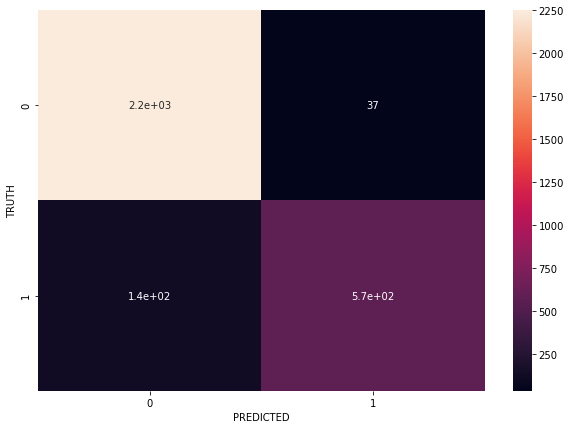

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

In [74]:
score=model.score(X_test,Y_test)
score

0.9413333333333334

In [77]:
recall=574/(574+139)
recall

0.8050490883590463

In [78]:
precision=574/(574+37)
precision

0.939443535188216

In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=26)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=26)

In [80]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [81]:
cm= confusion_matrix(Y_test,y_predicted)
cm

array([[2213,   74],
       [ 151,  562]], dtype=int64)

Text(69.0, 0.5, 'TRUTH')

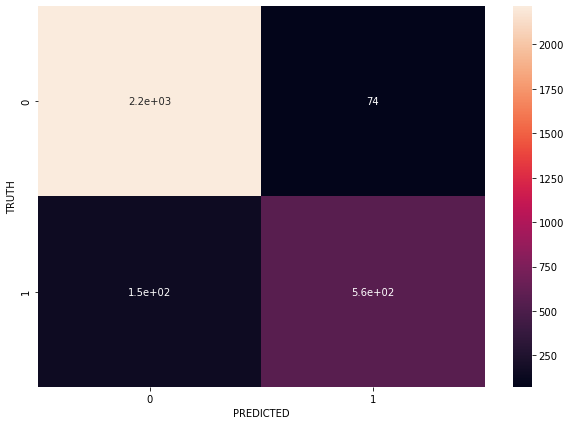

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

In [86]:
score=model.score(X_test,Y_test)
recall=562/(562+151)
precision=562/(562+74)
print(score,recall,precision)

0.925 0.788218793828892 0.8836477987421384
